# Analysing the 'Automobile Data Set' from the UC Irvine Machine Learning repository

This notebook is used to analyze the 'Automobile Data Set' from the UC Irvine Machine Learning repository. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Automobile). **The objective is to create a model to predict car prices base on its attributes**.

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

The notebook is divided as follows:
    
1. Data exploration
2. Train ML model
3. Evaluate the ML model
4. Conclusion

----------

## 1. Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

The dataset contains only two columns and 36 lines.
The first column of the dataset contains strings denoting the month number and the second column cotains integers denoting the number of passengers for that month.

After importing the data, we need to do some data cleaning. For now, we just substitute the "?" values by NaN, and make a few adjustements to the categorical variables, which will not significantly impact our model, but are necessary for it to function.

In [1]:
import pandas as pd
import numpy as np
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages (0.24.2)


----------

### Getting the data

In [2]:
with open("/Users/leuzinger/Dropbox/Data Science/Awari/Regressions/Automobile Data Set/imports-85.names") as f:
    print(f.read())

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This res

In [3]:
attributes = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
           'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type',
           'num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
           'peak_rpm','city_mpg','highway_mpg','price']
df_data = pd.read_csv('/Users/leuzinger/Dropbox/Data Science/Awari/Regressions/Automobile Data Set/imports-85(1).data',names=attributes)
df_data.reset_index(inplace=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
df_data['num_of_doors'].replace("?","four",inplace=True)
df_data.replace("?",np.nan,inplace=True)
df_data.dropna(subset = ["price"], inplace=True)
indexNames = df_data[df_data['make'] == 'mercury'].index
df_data.drop(indexNames, inplace=True)

num_cols = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']
df_data[num_cols] = df_data[num_cols].apply(pd.to_numeric, errors='coerce')

df_data.reset_index(drop=True,inplace=True)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

----------

### Data visualization

A "quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute" (GÉRON, 2019).

**For this initial exploration, we are only considering continous values. Categorical values will be examined later**.

Therefore, we will start our analysis making some histograms that are useful for understanding the dataset. We see that some histograms are tail-heavy: they extend much farther to the right of the median than to the left. Besides, only few attributes seems to have a normal distribution.

Next, we can look to which attributes have the higher correlation with the price. First, we create a correlation matrix. Then, we make some scatter plots and a heatmap to vizualaize the correlations. **We can see that the varibales that have the stronger postive correlations with the car price are the engine size, curb weight, horsepower, and with. Besides, city mpg and highway mpg have a strong negative correlation with the price**.

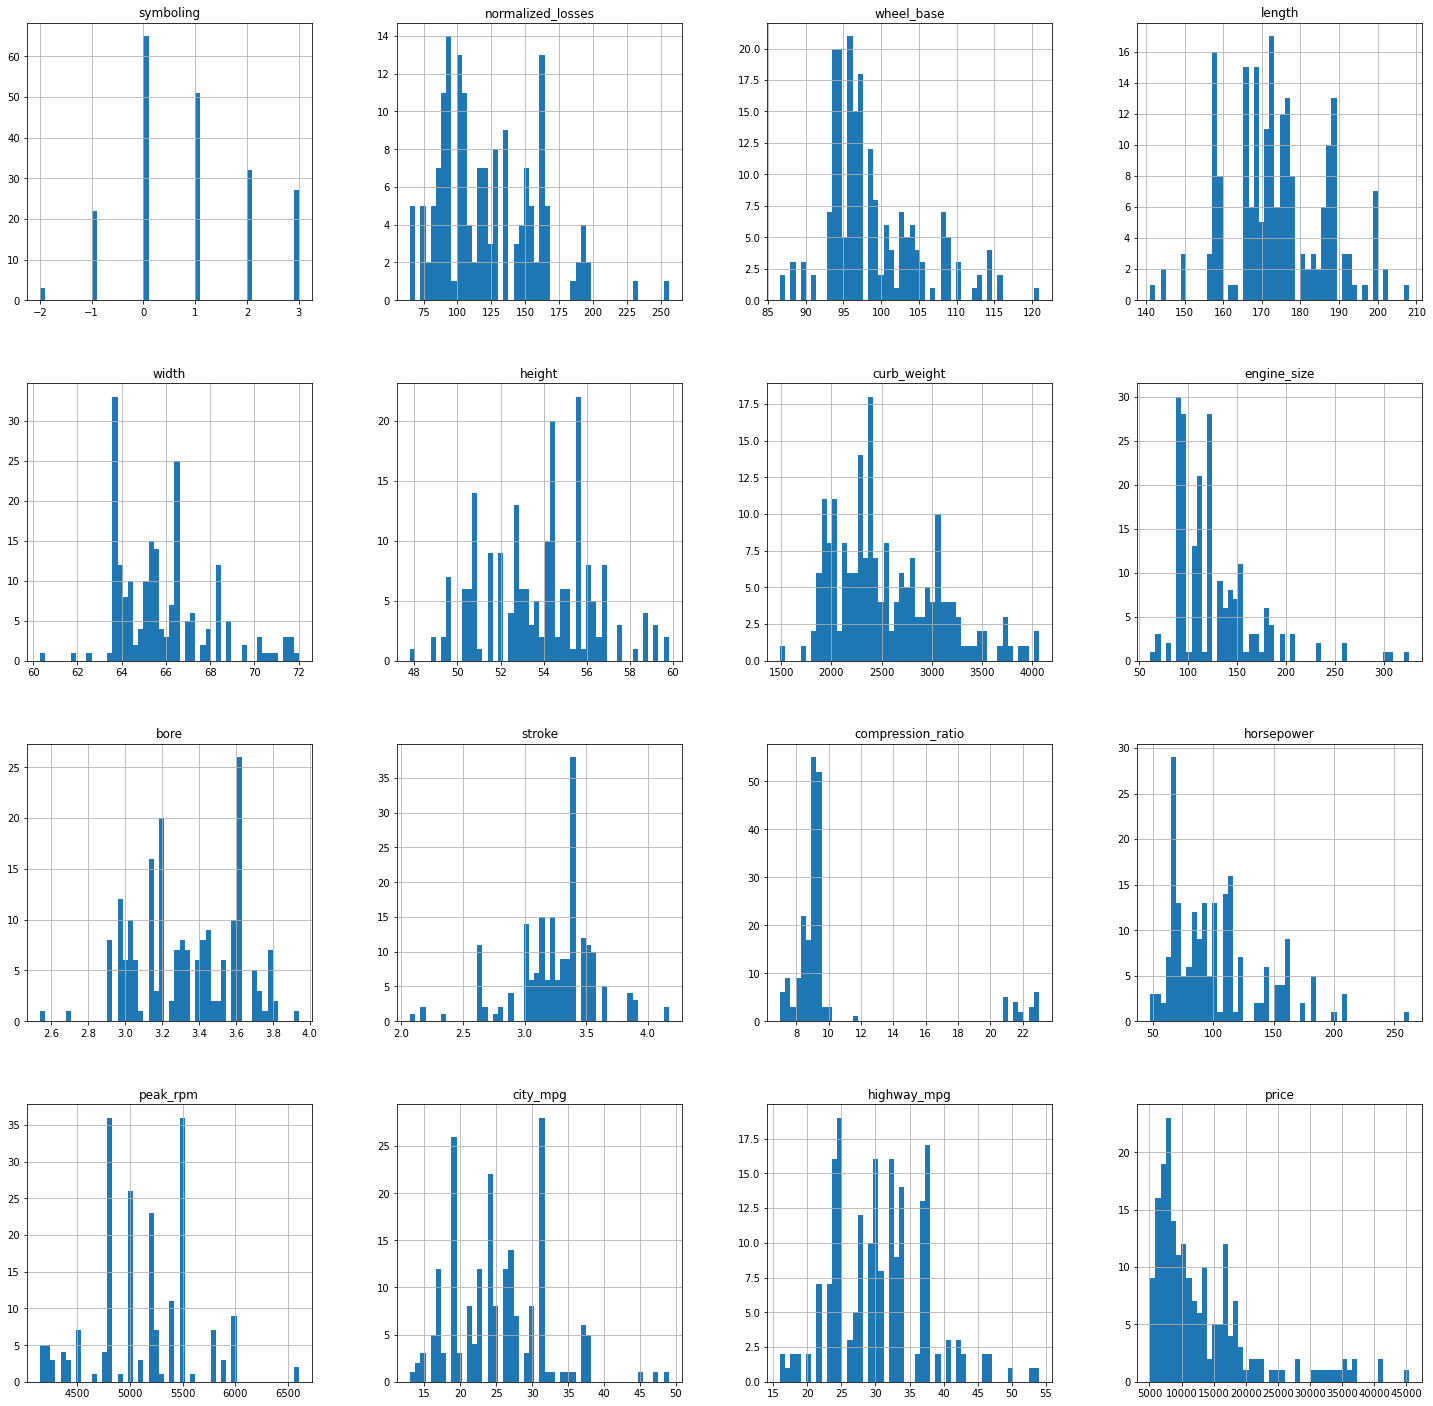

In [7]:
import matplotlib.pyplot as plt

df_data.hist(bins=50,figsize=(25, 25))

plt.show()

In [8]:
corr_matrix = df_data.corr()
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine_size          0.872273
curb_weight          0.834331
horsepower           0.814471
width                0.751403
length               0.690418
wheel_base           0.584161
bore                 0.544032
normalized_losses    0.203254
height               0.134725
stroke               0.083287
compression_ratio    0.072318
symboling           -0.082695
peak_rpm            -0.101200
city_mpg            -0.686460
highway_mpg         -0.704658
Name: price, dtype: float64

<Figure size 1152x2160 with 0 Axes>

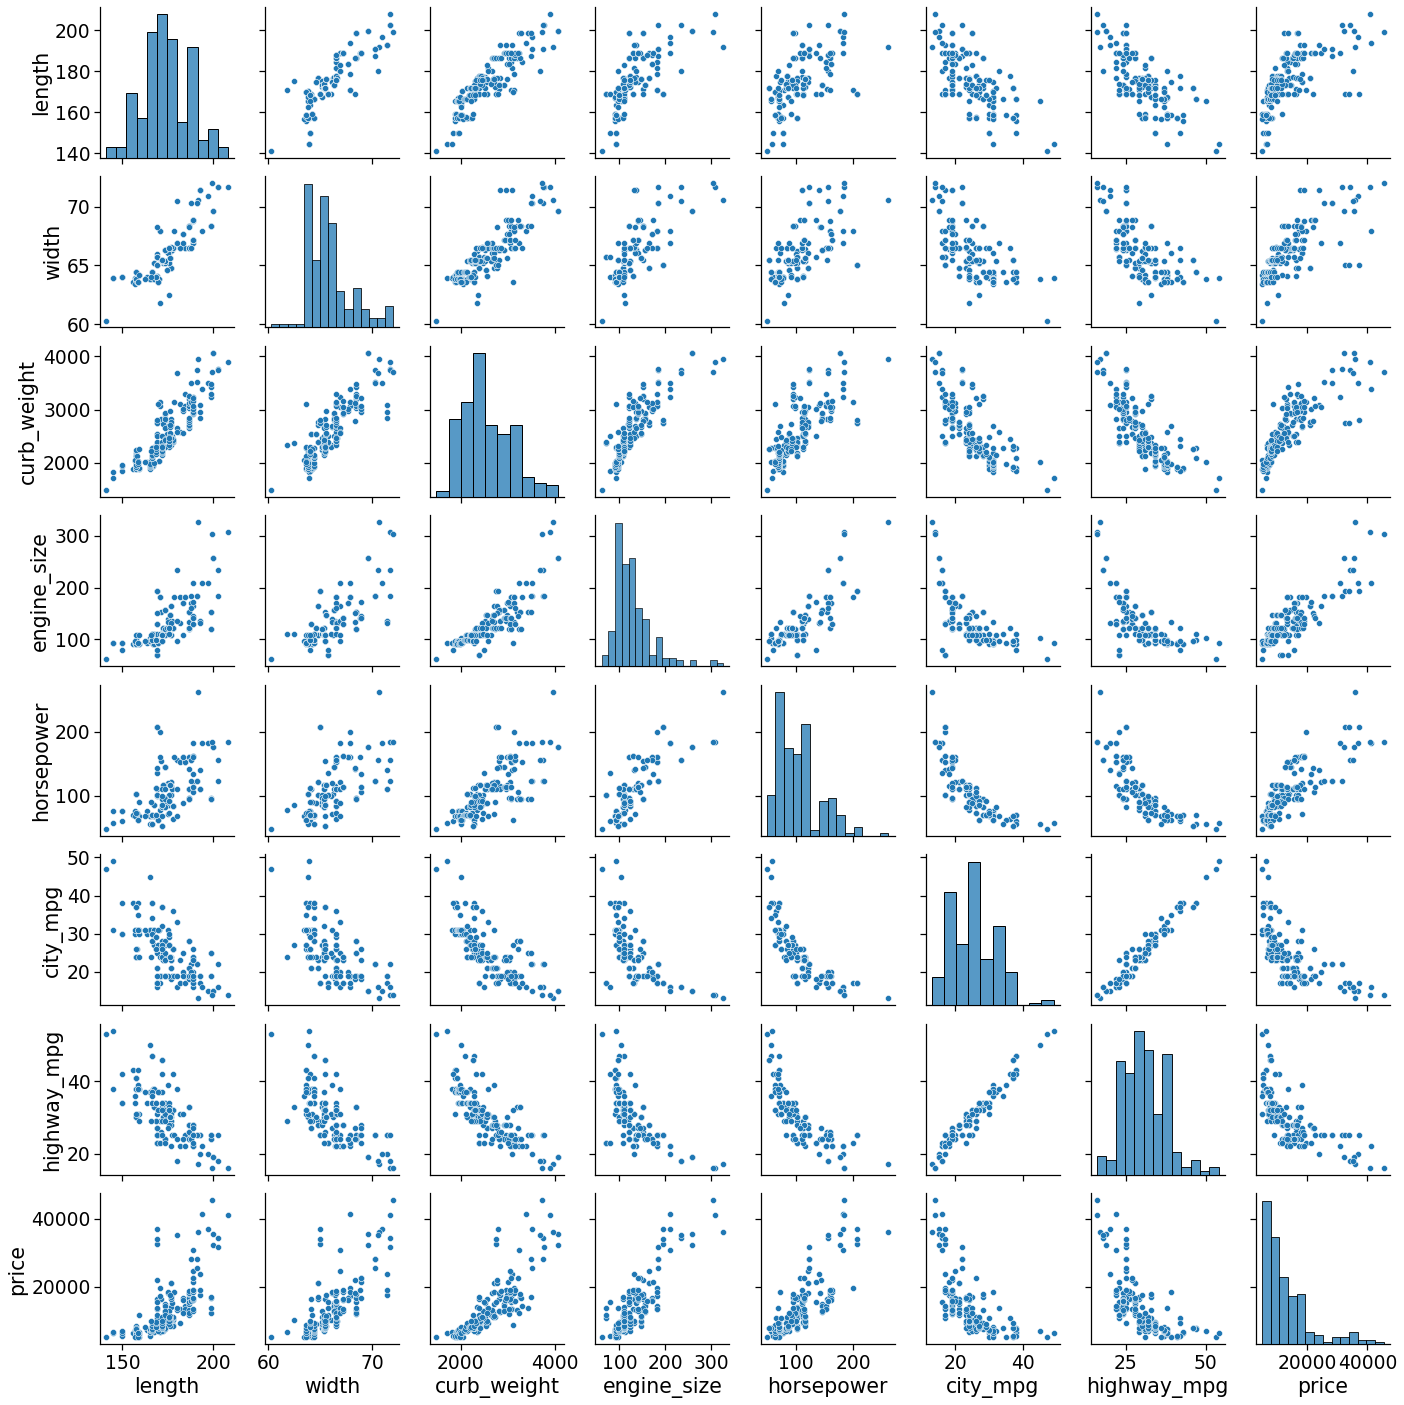

In [9]:
import seaborn as sns

plt.figure(figsize=(16, 30))
sns.set_context("notebook", font_scale=1.7)
sns.pairplot(df_data.drop(columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
           'drive_wheels','engine_location','height','engine_type','wheel_base','bore',
           'num_of_cylinders','fuel_system','stroke','compression_ratio',
           'peak_rpm']))

plt.show()

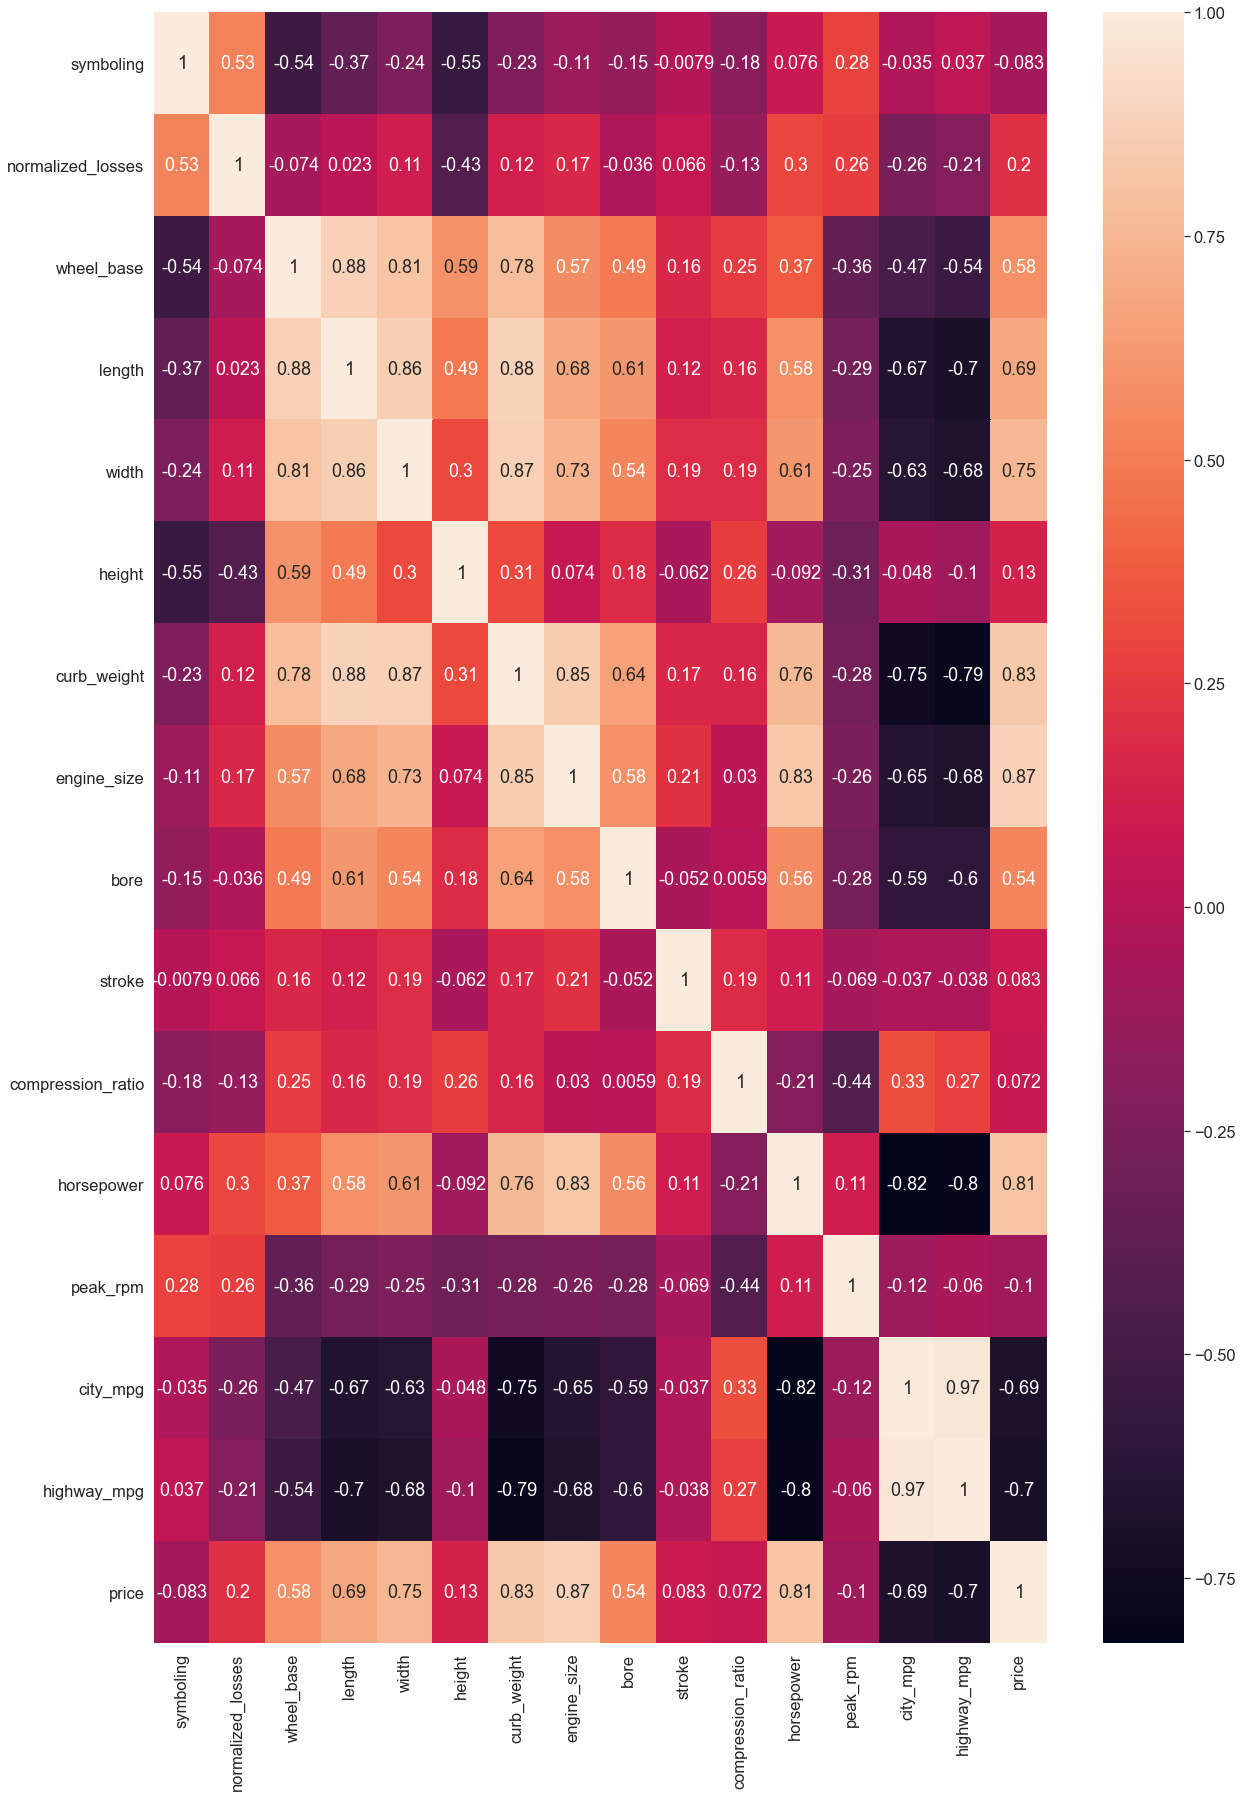

In [10]:
plt.figure(figsize=(20, 30))
sns.set_theme()
sns.set_context("notebook", font_scale=1.5)
sns.heatmap(corr_matrix,annot=True)
plt.show()

----------

### Creating the Train and Test sets

Creating a test set at the beginning of the project avoid *data snooping* bias, i.e., "when you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected" (GÉRON, 2019). To avoid this problem, we divide our data into a train and a test set. 

Besides, to avoid introducing a sampling bias into the sets, we will use a stratified sampling, taking the car brand as the reference because it is the categorical variable with more unique values. By doing this, the test set generated using stratified sampling has symboling category proportions almost identical to those in the full dataset.

In [11]:
df_data.drop(columns=num_cols).nunique()

make                21
fuel_type            2
aspiration           2
num_of_doors         2
body_style           5
drive_wheels         3
engine_location      2
engine_type          6
num_of_cylinders     7
fuel_system          8
dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)

for train_index, test_index in split.split(df_data,df_data['make']):
    train_set = df_data.loc[train_index]
    test_set = df_data.loc[test_index]

In [13]:
test_set['make'].value_counts()/len(test_set)

toyota           0.150
nissan           0.100
honda            0.075
mitsubishi       0.075
mazda            0.075
bmw              0.050
peugot           0.050
subaru           0.050
mercedes-benz    0.050
volkswagen       0.050
volvo            0.050
dodge            0.050
alfa-romero      0.025
audi             0.025
jaguar           0.025
chevrolet        0.025
plymouth         0.025
saab             0.025
porsche          0.025
Name: make, dtype: float64

In [14]:
df_data['make'].value_counts()/len(df_data)

toyota           0.160
nissan           0.090
mazda            0.085
mitsubishi       0.065
honda            0.065
subaru           0.060
volkswagen       0.060
peugot           0.055
volvo            0.055
dodge            0.045
bmw              0.040
mercedes-benz    0.040
plymouth         0.035
audi             0.030
saab             0.030
porsche          0.020
chevrolet        0.015
jaguar           0.015
alfa-romero      0.015
renault          0.010
isuzu            0.010
Name: make, dtype: float64

In [15]:
df_car = train_set.drop('price',axis=1)
df_car_price = train_set['price'].copy()

----------

### Preparing the data for ML algorithms

Before creating the ML models, we need to prepare the data so that the ML algorithms will work properly.

First, we need to clean missing values from the dataset. We have three option to deal with it [(GÉRON, 2019)](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646):

1. Get ride of the rows with missing values
2. Get ride of the whole attirbute that have missing values
3. Set the values to some value (the median, the mean, zero, etc)

We will use the median value.

Second, we need to deal with the text attributes. A common way to deal with categorial variables is to use the method called one-hot encoding. It creates one binary attribute for each category (GÉRON, 2019).

Third, we need to put all the attributes in the same scale because "Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales" (GÉRON, 2019). To do this we standardized all the numerical variables.

In [16]:
from sklearn.impute import SimpleImputer

df_car.replace("?",np.nan,inplace=True)

imputer_num = SimpleImputer(strategy='median')

df_car_num = df_car.drop(['make','fuel_type','aspiration','num_of_doors','body_style',
           'drive_wheels','engine_location','engine_type',
           'num_of_cylinders','fuel_system'],axis=1)

imputer_num.fit(df_car_num)

X=imputer_num.transform(df_car_num)
df_car_tr = pd.DataFrame(X,columns=df_car_num.columns,index=df_car_num.index)
df_car_tr.head()
#df_data.update(df_data_tr)
#df_data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
51,1.0,113.0,93.1,166.8,64.2,54.1,1950.0,91.0,3.08,3.15,9.0,68.0,5000.0,31.0,38.0
42,0.0,116.5,94.3,170.7,61.8,53.5,2337.0,111.0,3.31,3.23,8.5,78.0,4800.0,24.0,29.0
32,1.0,101.0,93.7,150.0,64.0,52.6,1940.0,92.0,2.91,3.41,9.2,76.0,6000.0,30.0,34.0
91,1.0,128.0,94.5,165.6,63.8,53.3,2028.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
120,3.0,116.5,95.9,173.2,66.3,50.2,2818.0,156.0,3.59,3.86,7.0,145.0,5000.0,19.0,24.0


In [17]:
df_car_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 51 to 164
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    float64
 1   normalized_losses  160 non-null    float64
 2   wheel_base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb_weight        160 non-null    float64
 7   engine_size        160 non-null    float64
 8   bore               160 non-null    float64
 9   stroke             160 non-null    float64
 10  compression_ratio  160 non-null    float64
 11  horsepower         160 non-null    float64
 12  peak_rpm           160 non-null    float64
 13  city_mpg           160 non-null    float64
 14  highway_mpg        160 non-null    float64
dtypes: float64(15)
memory usage: 20.0 KB


In [18]:
df_car_tr.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
count,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.831250,120.643750,98.754375,174.14000,65.865625,53.721875,2543.043750,126.31250,3.331562,3.262687,10.336938,102.581250,5119.375000,25.468750,31.018750
std,1.274924,31.940116,5.952208,12.14687,2.085712,2.384111,502.515651,39.79447,0.268470,0.326948,4.216883,37.230621,495.831285,6.495206,6.838176
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.00000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.67500,64.200000,52.000000,2190.750000,98.00000,3.150000,3.140000,8.600000,71.500000,4800.000000,20.000000,25.000000
50%,1.000000,116.500000,97.000000,173.20000,65.500000,54.000000,2412.000000,120.00000,3.310000,3.350000,9.000000,95.000000,5200.000000,25.000000,30.000000
75%,2.000000,134.000000,102.100000,181.55000,66.500000,55.500000,2863.250000,142.00000,3.590000,3.422500,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,115.600000,202.60000,72.000000,59.800000,4066.000000,326.00000,3.800000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000


In [19]:
from sklearn.preprocessing import OneHotEncoder

df_car_cat = df_car.drop(columns=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'])

cat_encoder = OneHotEncoder()
df_data_cat_1hot = cat_encoder.fit_transform(df_car_cat)
df_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_sacler',StandardScaler())])

df_car_num_tr = num_pipe.fit_transform(df_car_num)
df_car_num_tr[0]

array([ 0.13277636, -0.24006642, -0.95294515, -0.60616816, -0.80109555,
        0.15910008, -1.18385516, -0.89015814, -0.93996463, -0.34574664,
       -0.31803947, -0.93175522, -0.24151321,  0.85426342,  1.02412823])

In [21]:
num_attributes = list(df_car_num)
cat_attributes = list(df_car_cat)

final_pipe = ColumnTransformer([
    ('num',num_pipe,num_attributes),
    ('cat',OneHotEncoder(),cat_attributes)]
    ,remainder='passthrough')

df_car_ML = final_pipe.fit_transform(df_car)
df_car_ML[0]

array([ 0.13277636, -0.24006642, -0.95294515, -0.60616816, -0.80109555,
        0.15910008, -1.18385516, -0.89015814, -0.93996463, -0.34574664,
       -0.31803947, -0.93175522, -0.24151321,  0.85426342,  1.02412823,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.  

----------

## 2. Train ML model

After preparing the data set, we are ready to select and train our ML model to predict the car price.

We start with Linear Regression (LR) model. "A regression model, such as linear regression, models an output value based on a linear combination of input values" [(Brownlee, 2020)](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/).

Our LR model have an RMSE of 1404.4, while the mean price of cars in the training set is 10093.5 and the median price is 13081.0. The car prices range between 5118 to 45400. Thus, we can assume that the model is reasanobly accurate. However, the large values for the intercept and the coefficients indicate that the model is overfitting to the data. 

Therefore, we can try some regularized linear models. This kind of model constrain the weights of the model, avoiding overfitting (GÉRON, 2019). We try three regularized linear models:

1. Ridge regression
2. Lasso regression
3. Elastic Net

As expected, these three models perform better than the LR model. **The best one is Ridge regression**, which have a mean score of 2639.8 and a standard deviation of 984.5 in the cross-validation. Therefore, we will use this method in the test set.

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(df_car_ML,df_car_price)

LinearRegression(normalize=True)

In [23]:
lin_reg.intercept_,lin_reg.coef_

(4626505370360773.0,
 array([-6.30661789e+02, -3.20587715e+02,  2.65567858e+03, -2.21605796e+03,
         6.25924870e+02, -1.60294558e+03,  3.38725374e+03,  4.84576099e+03,
        -8.98362659e+02, -6.28162038e+02, -2.88271583e+03,  4.26647827e+02,
         1.43882279e+03, -2.01346692e+02,  1.44934315e+03, -9.73306406e+14,
        -9.73306406e+14, -9.73306406e+14, -9.73306406e+14, -9.73306406e+14,
        -4.09701670e+14, -9.73306406e+14, -9.73306406e+14, -9.73306406e+14,
        -9.73306406e+14, -9.73306406e+14, -9.73306406e+14, -8.30450097e+14,
        -9.73306406e+14, -2.78436979e+15, -9.73306406e+14, -9.73306406e+14,
        -7.27216030e+14, -9.73306406e+14, -9.73306406e+14, -9.73306406e+14,
        -7.38223301e+14, -5.06527285e+14,  1.51074312e+14,  1.51074312e+14,
         1.42750191e+14,  1.42750191e+14, -2.76942440e+14, -2.76942440e+14,
        -2.76942440e+14, -2.76942440e+14, -2.76942440e+14, -2.41542883e+14,
        -2.41542883e+14, -2.41542883e+14, -4.27988252e+14,  1.62916

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def regression (estimator):
    car_price_pred = estimator.predict(df_car_ML)
    mse = mean_squared_error(df_car_price,car_price_pred)
    rmse = np.sqrt(mse)
    print(rmse)
    print(df_car_price.median(),df_car_price.mean())

    scores = cross_val_score(estimator,df_car_ML,df_car_price,scoring='neg_mean_squared_error',cv=10)
    rmse_scores = np.sqrt(-scores)
    print('\nCross-Validation:','\nScores:',rmse_scores,'\nMean: ', rmse_scores.mean(),'\nStd: ', rmse_scores.std())

In [25]:
regression(lin_reg)

1404.4146623237739
10093.5 13080.99375

Cross-Validation: 
Scores: [6.91265975e+15 2.17844530e+03 8.41239705e+15 2.81547114e+16
 2.18532082e+03 7.16912468e+14 1.78593393e+15 1.85986645e+03
 2.16134233e+03 3.08972190e+03] 
Mean:  4598261460922470.0 
Std:  8387517525209383.0


In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(df_car_ML,df_car_price)

SGDRegressor(eta0=0.1, penalty=None)

In [27]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4054.7515219]),
 array([ -129.45823883,  -553.98635734,  1283.29855529,  -764.1098824 ,
          547.60720201,  -200.65284111,  2552.55796179,  3158.77908292,
         -389.69997359,  -598.38629938,   451.3601552 ,  1276.79803539,
         1032.27606425,  -392.1776938 ,  1205.99418546,   749.71554553,
         1464.16758533,  5227.93786113,    87.2985134 , -1303.47562343,
         -137.78479721,  -418.98603027,   794.17339224,   780.90983624,
         3798.93766837, -1795.67298286,  -592.89302282,  -989.07245911,
        -1406.62701351,  3711.18285927,  -875.10543628,   939.49811055,
        -1714.20310621, -1845.06818119,  -911.89809464, -1508.28310263,
         1402.1720078 ,  2652.5795141 ,  1098.56571653,  2956.18580537,
         1994.18569033,  2060.56583158,  3874.87750365,   837.36084756,
         -181.45067683,    97.93018236,  -573.96633485,  1300.47585234,
         1246.19025371,  1508.08541585,   343.56866264,  3711.18285927,
          353.06586807,   247.15241733, 

In [28]:
regression(sgd_reg)

1688.0430744208766
10093.5 13080.99375

Cross-Validation: 
Scores: [1788.44776525 1967.7560241  2194.06878669 4506.41779689 2483.50749434
 3414.33382015 3674.70145884 1945.2438178  2742.18993892 4328.5942803 ] 
Mean:  2904.5261183276366 
Std:  959.1064589760781


In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(df_car_ML,df_car_price)

Ridge(alpha=1, solver='cholesky')

In [30]:
ridge_reg.intercept_,ridge_reg.coef_

(18974.837935911564,
 array([ -112.67034186,  -363.99248514,  1504.85421225,  -949.58078859,
          626.21412284,  -483.16139607,  2438.84748572,  3116.29342662,
         -249.62812433,  -695.49733664,  -467.78649658,  1053.2079532 ,
         1015.82217063,  -442.20672435,  1288.26450901,  1183.79923904,
         1713.41811638,  5176.16142598,  -795.99918411, -1921.84686146,
         -498.93277588,  -441.74337629,   489.46390743,   475.13987793,
         3066.51705085, -2195.54957414,  -674.69498204, -1456.29778716,
        -1845.43283458,  2766.15426419,  -917.95054608,  1447.08151613,
        -1978.38396108, -1802.8809041 ,  -590.07025909, -1197.95235192,
          733.1048322 ,  -733.1048322 ,  -834.95040967,   834.95040967,
          -67.08850879,    67.08850879,  2595.27231211,    -9.44979186,
        -1026.00827559,  -575.77498953,  -984.03925514,   411.06221168,
         -218.73665617,  -192.32555552, -2766.15426419,  2766.15426419,
         -111.85173113,  -371.58160983,   8

In [31]:
regression(ridge_reg)

1603.0629065951002
10093.5 13080.99375

Cross-Validation: 
Scores: [1595.88505835 1857.35902304 1969.16291547 4752.18156545 2202.20636511
 2869.52438566 3292.42890736 1615.84555543 2452.79756767 3790.63165453] 
Mean:  2639.80229980731 
Std:  984.4762236674517


In [32]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(df_car_ML,df_car_price)

Lasso(alpha=0.1)

In [33]:
lasso_reg.intercept_,lasso_reg.coef_

(14550.072625396924,
 array([-6.26001759e+02, -3.19348534e+02,  2.63605080e+03, -2.20379774e+03,
         6.30437077e+02, -1.58207065e+03,  3.36785693e+03,  4.77267069e+03,
        -8.60762701e+02, -6.30414314e+02, -2.70256734e+03,  4.75511240e+02,
         1.43812193e+03, -2.03115572e+02,  1.44460512e+03,  3.78326326e+03,
         5.36261678e+03,  8.45000759e+03, -4.15113947e+03, -3.97136740e+03,
        -1.38266122e+03, -0.00000000e+00, -2.13316441e+02,  1.13303084e+03,
         4.34815582e+03, -3.83354959e+03,  6.06007295e+01, -5.02381535e+02,
        -3.35556218e+03,  1.36924507e+04, -5.95562005e+02,  5.42030906e+03,
        -7.59293290e+02, -9.13924202e+02,  1.46402266e+03,  6.41227109e+01,
         8.36557664e+03, -1.10501471e-09, -2.32302066e+03,  1.06527482e-11,
        -3.06628614e+02,  0.00000000e+00,  2.91653117e+03, -0.00000000e+00,
        -8.79515229e+02, -0.00000000e+00,  3.26339608e+02,  1.40254381e+03,
         1.63127826e+02, -4.46098208e+02, -9.68221827e+02,  1.75719

In [34]:
warnings.filterwarnings("ignore")
regression(lasso_reg)

1404.4475906833827
10093.5 13080.99375

Cross-Validation: 
Scores: [2146.62952413 2257.74147102 3485.98406301 7677.95860781 2171.23714704
 2564.99208972 3090.15667532 1856.36333816 2167.64427577 3530.41289889] 
Mean:  3094.912009086437 
Std:  1627.1093979201144


In [35]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(df_car_ML,df_car_price)

ElasticNet(alpha=0.1)

In [36]:
elastic_net.intercept_,elastic_net.coef_

(16161.370549472054,
 array([  241.74603064,  -332.39583052,   605.90145387,  -308.9497155 ,
          759.13562371,   147.05586406,  1474.93441176,  2733.90393888,
          -67.52737114,  -727.56707801,   272.18340977,  1626.46485703,
          672.6860921 ,  -202.08496281,   439.85986008,    84.43294915,
          330.55746746,  2153.3264593 ,   157.48644375,  -176.89257436,
          -48.90286495,  -243.99835511,    68.94822777,   431.15985994,
         1733.84129231,  -700.17132201,  -618.54290941,  -635.51083867,
         -406.113938  ,  1273.77911618,  -224.96426424,   254.79348886,
         -934.11651688, -1301.46124424,  -525.98626936,  -668.6638161 ,
          248.23536053,  -248.23547588,  -203.22037765,   203.21975438,
         -111.50257705,   111.50216606,  1410.21578428,   239.51711091,
         -839.97803051,   -94.38656467,  -714.3670018 ,  -147.01191968,
         -378.51073926,   526.5232855 , -1273.77883394,  1273.7787491 ,
         -283.64671416,  -348.37039684,   7

In [37]:
regression(elastic_net)

2164.907772267349
10093.5 13080.99375

Cross-Validation: 
Scores: [1730.91363658 2057.17763975 1814.34549652 4821.62657427 2313.49422878
 3079.06744452 3176.61112111 1880.1270179  3025.64909383 4069.54383412] 
Mean:  2796.855608738631 
Std:  985.8168414790156


---------

# 3. Evaluate the ML model

Now evaluate the performance of our ML model in the test set, to see how it perform with unseen data.

We see that the model performs as expected with the test set. We have 95% confidence that the RMSE will be between 1273.9 and 2252.3, which is an accepbtable erros for such a simple model.

In [38]:
X_test = test_set.drop('price',axis=1)
y_test = test_set['price'].copy()

X_test_prep = final_pipe.transform(X_test)

y_hat = ridge_reg.predict(X_test_prep)
final_mse = mean_squared_error(y_test,y_hat)
final_rmse = np.sqrt(final_mse)
print('RMSE: %.2f'%final_rmse)

RMSE: 1829.71


In [39]:
from scipy import stats
conf = 0.95
sq_errors = (y_hat-y_test)**2
np.sqrt(stats.t.interval(conf,len(sq_errors)-1,loc=sq_errors.mean(),scale=stats.sem(sq_errors)))

array([1273.88081542, 2252.31210263])

----------------------

## 4. Conclusion

In this notebook, we were able to create a model to predict car prices base on its attributes. After preparing the data, we tried four different regression models. 

1. Linear regression
2. Ridge regression
3. Lasso regression
4. Elastic Net

We verified that the Ridge regression performed best with the train set. Then, we evaluated this model using the test set we separeted during the data preparation.

**We verify that the model had the same performance with the test set as with the train set. We have a 95% confidence that the RMSE will be between between 1273.9 and 2252.3, which is an accepbtable erros for such a simple model**. 